# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q="


In [4]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=15cb2043ba0bca628bcbf44aa8cd6e24&q=


In [5]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
new_cities = []
humidity = []
max_temp = []
cloudiness = []
wind_speed = []
country = []
date = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city + '&units=imperial')
        # print(city)
        # print(response.content)
        response_json = response.json()
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        wind_speed.append(response_json['wind']['speed'])
        cloudiness.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        new_cities.append(city)
        print(f"{city} has been added to the weather data.")
    except:
        print(f"The city of {city} couldn't be found.")

albany has been added to the weather data.
elizabeth city has been added to the weather data.
cayenne has been added to the weather data.
cockburn town has been added to the weather data.
port alfred has been added to the weather data.
The city of amderma couldn't be found.
mugur-aksy has been added to the weather data.
nikolskoye has been added to the weather data.
waddan has been added to the weather data.
The city of dien bien couldn't be found.
adrar has been added to the weather data.
portobelo has been added to the weather data.
avarua has been added to the weather data.
vostok has been added to the weather data.
longyearbyen has been added to the weather data.
rehau has been added to the weather data.
atuona has been added to the weather data.
airai has been added to the weather data.
katsuura has been added to the weather data.
oranjemund has been added to the weather data.
gayeri has been added to the weather data.
thompson has been added to the weather data.
The city of baren

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": new_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

#change to F and MPH
weather_data = pd.DataFrame(weather_dict)
weather_data['City'] = weather_data['City'].str.title()
weather_data['Max Temp'] = weather_data['Max Temp']
weather_data.to_csv('weather_data.csv')
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,21.45,57,4,3.00,US,1644090484
1,Elizabeth City,36.2946,-76.2511,43.00,48,75,1.99,US,1644090176
2,Cayenne,4.9333,-52.3333,84.24,81,75,5.99,GF,1644090636
3,Cockburn Town,21.4612,-71.1419,80.56,54,40,11.50,TC,1644090115
4,Port Alfred,-33.5906,26.8910,70.48,83,93,25.52,ZA,1644090085
...,...,...,...,...,...,...,...,...,...
566,Half Moon Bay,37.4636,-122.4286,64.58,57,0,4.61,US,1644090830
567,Bonfim,3.0833,-59.9500,90.73,44,100,5.48,BR,1644090830
568,Bilibino,68.0546,166.4372,-15.63,93,15,4.59,RU,1644090831
569,Palana,59.1167,159.9667,3.07,86,100,7.67,RU,1644090831


In [7]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,19.696969,18.357785,49.856602,72.919440,59.299475,8.618266,1.644091e+09
std,33.213132,89.319880,32.523546,21.720727,40.604247,6.488155,2.434965e+02
min,-54.800000,-175.200000,-44.550000,7.000000,0.000000,0.000000,1.644090e+09
25%,-8.803250,-63.284550,26.405000,63.000000,14.000000,3.815000,1.644091e+09
50%,22.933300,24.662200,60.330000,78.000000,75.000000,6.910000,1.644091e+09
75%,48.493650,96.236050,77.260000,89.000000,100.000000,11.510000,1.644091e+09
max,78.218600,178.416700,96.570000,100.000000,100.000000,37.110000,1.644091e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#I skipped this step because there are no cities with humity over 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
#this is setting up the variables for the visualizations
latitude = weather_data["Lat"]
humidity = weather_data['Humidity']
maxtemp = weather_data['Max Temp']
clouds = weather_data['Cloudiness']
windspeed = weather_data['Wind Speed']

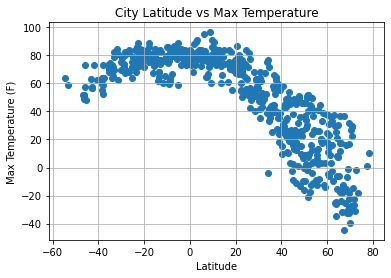

In [47]:
plt.scatter(latitude, maxtemp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
plt.grid()
plt.savefig('Images/lat_vs_temp.png')
plt.show()

In [11]:
#add a sentence or two explaining what the code is analyzing
#After analyzing the data, there does appear to be a correlation between latitude and the max temperatures. A

## Latitude vs. Humidity Plot

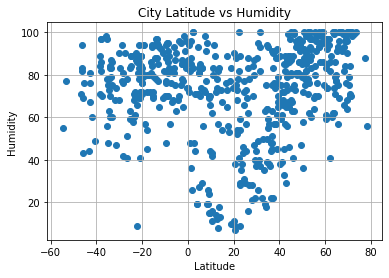

In [35]:
plt.scatter(latitude, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
plt.grid()
plt.savefig('Images/lat_vs_humidity.png')
plt.show()

In [13]:
#add a sentence or two explaining what the code is analyzing. write about the outliers ar
#-40 and 20 latitude. look up what is at those latitudes

## Latitude vs. Cloudiness Plot

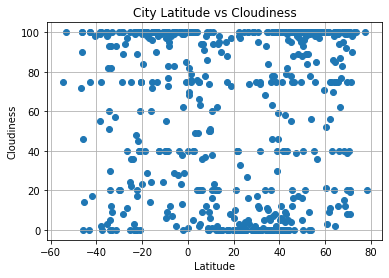

In [36]:
plt.scatter(latitude, clouds)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness')
plt.grid()
plt.savefig('Images/lat_vs_cloudiness.png')
plt.show()

In [15]:
#add a sentence or two explaining what the code is analyzing.

## Latitude vs. Wind Speed Plot

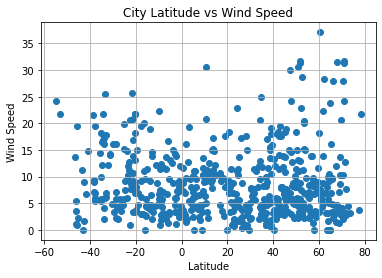

In [37]:

plt.scatter(latitude, windspeed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
plt.grid()
plt.savefig('Images/lat_vs_windspeed.png')
plt.show()

In [17]:
#add a sentence or two explaining what the code is analyzing.

## Linear Regression

In [18]:
#Here I created two different dataframes for the Northern and Southern Hemispheres
northern_df = weather_data.loc[weather_data["Lat"] > 0]
southern_df = weather_data.loc[weather_data['Lat'] < 0]

#Here I created the different varaibles based on the Northern and Southern Hemispheres
ntemp = northern_df['Max Temp']
stemp = southern_df['Max Temp']
nlat = northern_df["Lat"]
slat =southern_df["Lat"]
nhumid = northern_df["Humidity"]
shumid = southern_df["Humidity"]
ncloud = northern_df["Cloudiness"]
scloud = southern_df["Cloudiness"]
nwind = northern_df["Wind Speed"]
swind = southern_df["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.742944318788423


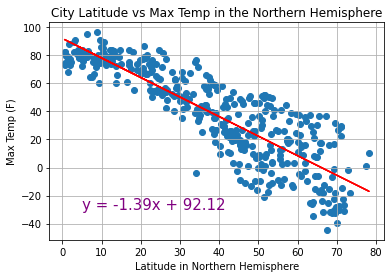

In [38]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, ntemp)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat, ntemp)
plt.xlabel('Latitude in Northern Hemisphere')
plt.ylabel('Max Temp (F)')
plt.title('City Latitude vs Max Temp in the Northern Hemisphere')
plt.plot(nlat, regress_values,"r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/northernlat_vs_temp.png')
plt.show()

In [20]:
#include observations

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.31429263568222526


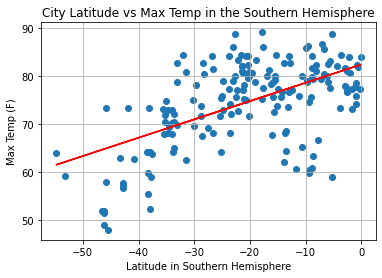

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, stemp)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat, stemp)
plt.xlabel('Latitude in Southern Hemisphere')
plt.ylabel('Max Temp (F)')
plt.title('City Latitude vs Max Temp in the Southern Hemisphere')
plt.plot(slat, regress_values,"r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/southernlat_vs_temp.png')
plt.show()

In [22]:
#include observations here

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18454679716266445


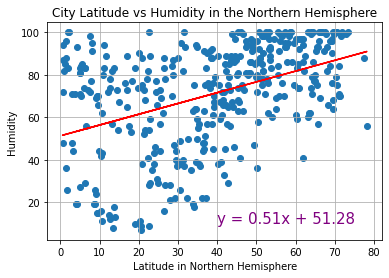

In [40]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nhumid)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat, nhumid)
plt.xlabel('Latitude in Northern Hemisphere')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity in the Northern Hemisphere')
plt.plot(nlat, regress_values,"r-")
plt.annotate(line_eq,(40, 10),fontsize=15,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/northernlat_vs_humidity.png')
plt.show()

In [24]:
#include observations here

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05525537231887263


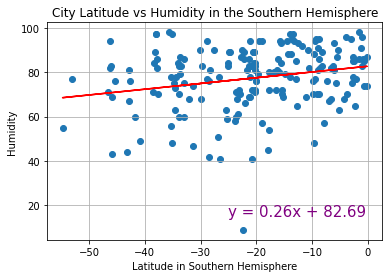

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, shumid)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat, shumid)
plt.xlabel('Latitude in Southern Hemisphere')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity in the Southern Hemisphere')
plt.plot(slat, regress_values,"r-")
plt.annotate(line_eq,(-25, 15),fontsize=15,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/southernlat_vs_humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09156593349188005


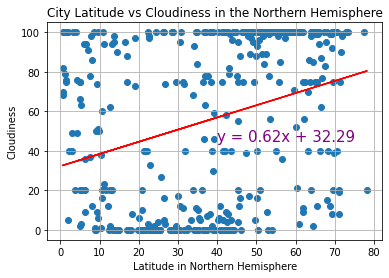

In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, ncloud)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat, ncloud)
plt.xlabel('Latitude in Northern Hemisphere')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness in the Northern Hemisphere')
plt.plot(nlat, regress_values,"r-")
plt.annotate(line_eq,(40, 45),fontsize=15,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/northernlat_vs_cloudiness.png')
plt.show()

In [27]:
#insert observations here

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.008741591844014542


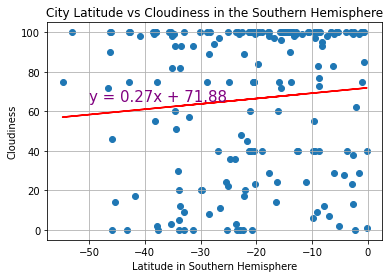

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, scloud)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat, scloud)
plt.xlabel('Latitude in Southern Hemisphere')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness in the Southern Hemisphere')
plt.plot(slat, regress_values,"r-")
plt.annotate(line_eq,(-50, 65),fontsize=15,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/southernlat_vs_cloudiness.png')
plt.show()

In [29]:
#insert observations here

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.012320336053141702


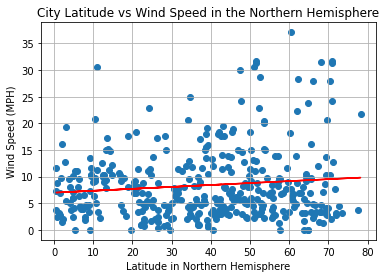

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nwind)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat, nwind)
plt.xlabel('Latitude in Northern Hemisphere')
plt.ylabel('Wind Speed (MPH)')
plt.title('City Latitude vs Wind Speed in the Northern Hemisphere')
plt.plot(nlat, regress_values,"r-")
plt.annotate(line_eq,(0, 40),fontsize=15,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/northernlat_vs_windspeed.png')
plt.show()

In [31]:
#insert observations here

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.049489281144295814


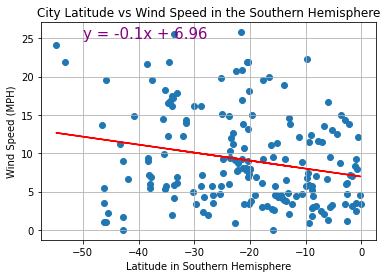

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, swind)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat, swind)
plt.xlabel('Latitude in Southern Hemisphere')
plt.ylabel('Wind Speed (MPH)')
plt.title('City Latitude vs Wind Speed in the Southern Hemisphere')
plt.plot(slat, regress_values,"r-")
plt.annotate(line_eq,(-50, 25),fontsize=15,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/southernlat_vs_windspeed.png')
plt.show()

In [33]:
#insert observations here